<a href="https://colab.research.google.com/github/Renaldinho/ML-ImageClassification/blob/main/Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [16]:
# Step 2: Load and Prepare the Data
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Load the EMNIST dataset from Google Drive (update the path accordingly)
data_path = "/content/drive/My Drive//dataset/archive/emnist-balanced-train.csv"
data = pd.read_csv(data_path).to_numpy()

# Split features and labels
X = data[:, 1:]  # contains image data (28x28 pixels per image).
y = data[:, 0]   # contains labels (corresponding characters).

# Normalize pixel values / Scales pixel values to the range [0, 1] for better model performance.
X = X / 255.0

# Reshape for CNN input (if using MLP, reshaping is not required)
X = X.reshape(-1, 28, 28, 1)  # -1: Converts X to a 4D array (samples, height, width, channels), required by CNN models.

# Convert labels to categorical (one-hot encoding)
y = to_categorical(y) # Transforms labels into one-hot encoded vectors (e.g., label 3 becomes [0, 0, 0, 1, 0, ...]).

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) # 70%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # 30%

# Print data shapes for verification
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training set shape: (78959, 28, 28, 1)
Validation set shape: (16920, 28, 28, 1)
Test set shape: (16920, 28, 28, 1)


Sample images from the dataset:


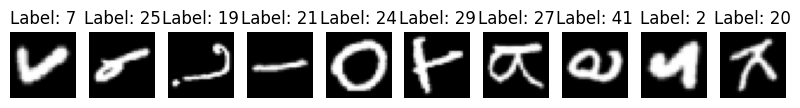

In [17]:
# Step 3: Visualize Sample Images
def plot_sample_images(X, y, n_samples=10):
    plt.figure(figsize=(10, 2))
    for i in range(n_samples):
        plt.subplot(1, n_samples, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap="gray")
        plt.title(f"Label: {np.argmax(y[i])}")
        plt.axis('off')
    plt.show()

print("Sample images from the dataset:")
plot_sample_images(X_train, y_train)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

# Define the Model
model = Sequential([
    # Convolutional Block 1: Extract basic features (e.g., edges, lines)
    Conv2D(filters=64, kernel_size=7, activation='relu', padding="SAME", input_shape=(28, 28, 1)),
    BatchNormalization(),  # Stabilize and speed up training
    MaxPooling2D(pool_size=2),  # Downsample the feature map by 2x2 to reduce spatial dimensions.

    # Convolutional Block 2: Extract more detailed features
    Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),  # Further downsample the feature map.

    # Convolutional Block 3: Capture even more abstract features
    Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),  # Further downsample to focus on key features.

    # Convolutional Block 4: Final feature extraction
    Conv2D(filters=256, kernel_size=3, activation='relu', padding="SAME"),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),  # Final downsampling to create compact feature maps.

    # Global Average Pooling to reduce overfitting
    GlobalAveragePooling2D(),  # Replaces Flatten()

    # Fully Connected Block 1: High-level decision making
    Dense(units=128, activation='relu', kernel_regularizer=l2(1e-4)),  # Add L2 regularization
    Dropout(0.5),  # Dropout with a 50% chance to prevent overfitting.

    # Fully Connected Block 2: Further decision refinement
    Dense(units=64, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.5),  # Another dropout layer for regularization.

    # Output Layer: Map features to class probabilities
    Dense(units=y_train.shape[1], activation='softmax')  # Adjusted to match the number of classes
])

# Print the model summary to visualize the architecture
model.summary()



# Step 4: Define the Model (CNN Architecture)
# model = Sequential([
    # Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Extracts features from the input image.
   #  MaxPooling2D((2, 2)), # Downsamples the features to reduce computational complexity
   #  Conv2D(64, (3, 3), activation='relu'),
   #  MaxPooling2D((2, 2)), # Another Conv2D + MaxPooling2D layer for deeper feature extraction
   #  Flatten(), # Converts 2D features into a 1D vector.
   #  Dense(128, activation='relu'), # Fully connected layers for classification
   #  Dense(y_train.shape[1], activation='softmax')  # Output layer # Maps features to class probabilities using the softmax activation
# ])
 # Conv2D =  Convolutional Layer , Applies 32 filters of size (3x3) to the input image. Each filter slides over the image (convolution operation) and detects patterns like edges, corners, etc.
 # Produces 32 feature maps of size (26x26) (28x28 input minus 3x3 filter with no padding).
 # Activation: relu introduces non-linearity, allowing the network to learn complex patterns.
# Print model summary
# model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 64)          │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 3, 3, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 47)                  │           3,055 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 566,319 (2.16 MB)

 Trainable params: 565,167 (2.16 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [19]:
# Define the file path in Google Drive
checkpoint_path = '/content/drive/My Drive/best1_model.keras'

# Compile the model with enhancements
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])

# Callbacks for better training
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint, early_stop, reduce_lr])

# Load the best model from Google Drive
model = load_model(checkpoint_path)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2461/2468 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - Precision: 0.4209 - Recall: 0.0389 - accuracy: 0.1439 - loss: 3.2253
Epoch 1: val_accuracy improved from -inf to 0.65278, saving model to /content/drive/My Drive/best1_model.keras
2468/2468 ━━━━━━━━━━━━━━━━━━━━ 61s 21ms/step - Precision: 0.4215 - Recall: 0.0391 - accuracy: 0.1442 - loss: 3.2232 - val_Precision: 0.8540 - val_Recall: 0.3726 - val_accuracy: 0.6528 - val_loss: 1.0536 - learning_rate: 0.0010
Epoch 2/20
2462/2468 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - Precision: 0.7023 - Recall: 0.3093 - accuracy: 0.5102 - loss: 1.5010
Epoch 2: val_accuracy improved from 0.65278 to 0.75065, saving model to /content/drive/My Drive/best1_model.keras
2468/2468 ━━━━━━━━━━━━━━━━━━━━ 45s 18ms/step - Precision: 0.7024 - Recall: 0.3094 - accuracy: 0.5103 - loss: 1.5007 - val_Precision: 0.8640 - val_Recall: 0.6223 - val_accuracy: 0.7507 - val_loss: 0.7500 - learning_rate: 0.0010
Epoch 3/20
2466/2468 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - Precision: 0.7649 - Rec

In [23]:
# Step 6: Evaluate the Model
results = model.evaluate(X_test, y_test)

# Unpack the results
test_loss, test_accuracy, test_precision, test_recall = results

# Print results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

529/529 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.8897 - Recall: 0.8275 - accuracy: 0.8538 - loss: 0.4618
Test Accuracy: 85.82%
Test Loss: 0.4467
Test Precision: 0.8923
Test Recall: 0.8291


Training history:


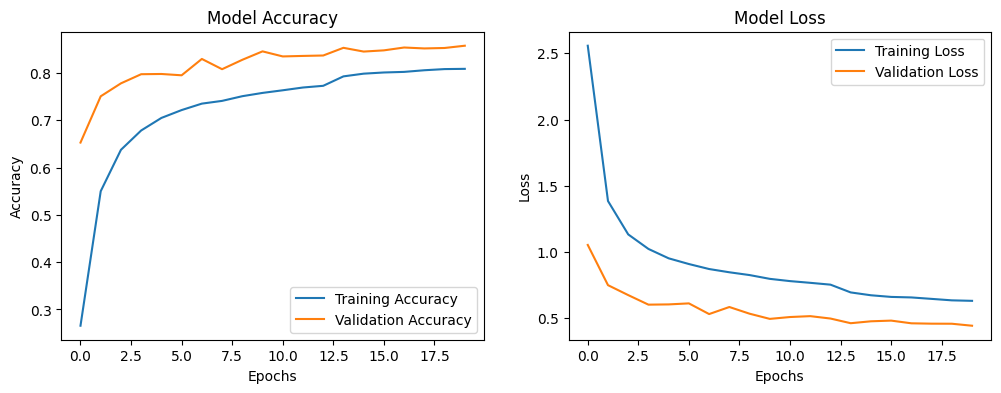

In [21]:
# Step 6.1: Visualize Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')

    plt.show()

print("Training history:")
plot_training_history(history)

In [24]:
# Step 6.2: Visualize Predictions
def visualize_predictions(X, y, model, n_samples=10):
    predictions = model.predict(X[:n_samples])
    plt.figure(figsize=(10, 2))
    for i in range(n_samples):
        plt.subplot(1, n_samples, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap="gray")
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y[i])
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
        plt.axis('off')
    plt.show()

Sample predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


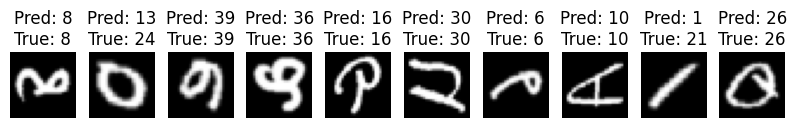

In [25]:
print("Sample predictions:")
visualize_predictions(X_test, y_test, model)

In [26]:
# Step 1: Load the Pre-trained Model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/best_model.keras')

# Step 2: Set Up Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=25,         # Moderate rotation
    width_shift_range=0.2,     # Moderate horizontal shift
    height_shift_range=0.2,    # Moderate vertical shift
    zoom_range=0.2,            # Moderate zoom
    horizontal_flip=True       # Flip horizontally only
)
datagen.fit(X_train)

# Step 3: Compile the Model with Moderately High Learning Rate
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-3),  # Moderately high learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Unfreeze Last Few Layers for Fine-Tuning
for layer in model.layers[-10:]:  # Unfreeze only the last 10 layers
    layer.trainable = True

# Step 5: Set Up Callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint(filepath='/content/drive/My Drive/fined_tuned_model.keras',
                             monitor='val_accuracy', save_best_only=True, verbose=1)

# Step 6: Fine-Tune the Model
history_fine_tune = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,  # Limit to 10 epochs
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr, early_stop, checkpoint]
)

# Step 7: Evaluate the Fine-Tuned Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Fine-Tuned Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Fine-Tuned Test Loss: {test_loss:.4f}")


Epoch 1/10
 152/2468 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.3280 - loss: 3.3748

KeyboardInterrupt: 